In [ ]:
__author__ = "Farzaneh Soltanzadeh"
__email__ = "f.soltanzadeh.f@gmail.com"
__organization__ = "Coursera"
__date__ = "2024-09-28"

Import Libraries 📚

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import plotly.graph_objs as go

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

Sample Dataset 

In [95]:
m = 100 # number of training examples
np.random.seed(11)

X = np.random.rand(m) * 10
Y = 1.3 * X + 5 + (np.random.rand(m)*8)

data = pd.DataFrame({'X': X, 'Y': Y})
data.head()

,X,Y
0,1.802697,9.889004
1,0.194752,6.997205
2,4.632185,17.781349
3,7.249339,16.841459
4,4.202036,13.968412


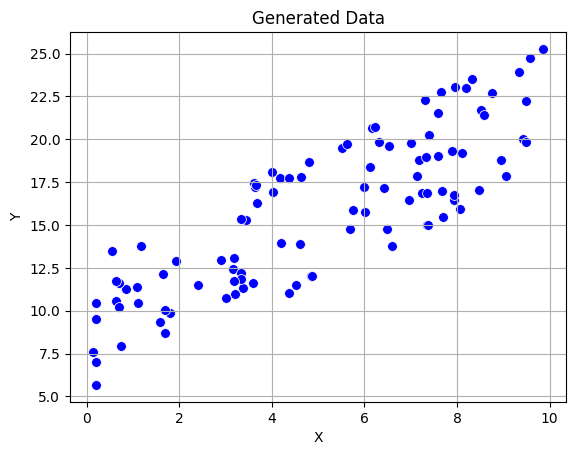

In [96]:
def plot_data(points=data):
    sns.scatterplot(x='X', y='Y', data=data, color='blue', s=50)
    plt.title('Generated Data')
    plt.grid(True)

plot_data()

# Gradient Descent

**Goal**: to find the parameters (W, b) that minimize the cost function J in linear regression.
- **Model**: f(x) = Wx + b
- **Parameters**: W (weight), b (bias)
- **Cost Function**: J = (1/2m) Σ(f(x) - y)²
- **Learning Rate**: α
### Algorithm:
1. Initialize parameters W and b to 0 or small random values.

2. Repeat until convergence or for a fixed number of iterations:
   
   a. Compute predictions: f(x) = Wx + b
   
   b. Calculate gradients:
      - ∂J/∂W = (1/m) Σ((f(x) - y) * x)
      - ∂J/∂b = (1/m) Σ(f(x) - y)
   
   c. Update parameters:
      - W = W - α * (∂J/∂W)
      - b = b - α * (∂J/∂b)

### Batch Gradient Descent

In [97]:
def batch_gradient_descent(X, Y, learning_rate=0.01, epochs=3000, tolerance=1e-6):
    logging.info("BGD process...")
    W, b = 0, 0
    m = len(X)
    weight_history, loss_history = [], []
    
    for epoch in range(epochs):
        y_pred = W * X + b
        
        loss = (1 / (2 * m)) * np.sum((y_pred - Y) ** 2)
        loss_history.append(loss)
        weight_history.append((W, b))

        logging.info(f"Epoch {epoch + 1}: W = {W:.6f}, b = {b:.6f}, Loss = {loss:.6f}")
        
        # Check for convergence
        if epoch > 0 and abs(loss_history[-2] - loss_history[-1]) < tolerance:
            logging.info(f"Converged at epoch {epoch + 1}")
            break
        
        # Update weights
        dW = (1 / m) * np.dot((y_pred - Y), X)
        db = (1 / m) * np.sum(y_pred - Y)
        W -= learning_rate * dW
        b -= learning_rate * db
    
    return W, b, loss_history, weight_history

In [98]:
# Training the model
W, b, loss_history, weight_history = batch_gradient_descent(data["X"], data["Y"])
logging.info(f"Final weights: W = {W:.6f}, b = {b:.6f}")

2024-09-28 18:33:31,404 - INFO - BGD process...
2024-09-28 18:33:31,409 - INFO - Epoch 1: W = 0.000000, b = 0.000000, Loss = 134.800196
2024-09-28 18:33:31,411 - INFO - Epoch 2: W = 0.906013, b = 0.158088, Loss = 64.754798
2024-09-28 18:33:31,414 - INFO - Epoch 3: W = 1.499342, b = 0.268738, Loss = 34.584397
2024-09-28 18:33:31,417 - INFO - Epoch 4: W = 1.887539, b = 0.348249, Loss = 21.575770
2024-09-28 18:33:31,420 - INFO - Epoch 5: W = 2.141165, b = 0.407316, Loss = 15.953450
2024-09-28 18:33:31,426 - INFO - Epoch 6: W = 2.306509, b = 0.452956, Loss = 13.510206
2024-09-28 18:33:31,430 - INFO - Epoch 7: W = 2.413940, b = 0.489770, Loss = 12.435304
2024-09-28 18:33:31,434 - INFO - Epoch 8: W = 2.483379, b = 0.520778, Loss = 11.949426
2024-09-28 18:33:31,439 - INFO - Epoch 9: W = 2.527897, b = 0.547962, Loss = 11.717165
2024-09-28 18:33:31,442 - INFO - Epoch 10: W = 2.556068, b = 0.572620, Loss = 11.594164
2024-09-28 18:33:31,446 - INFO - Epoch 11: W = 2.573518, b = 0.595606, Loss = 11

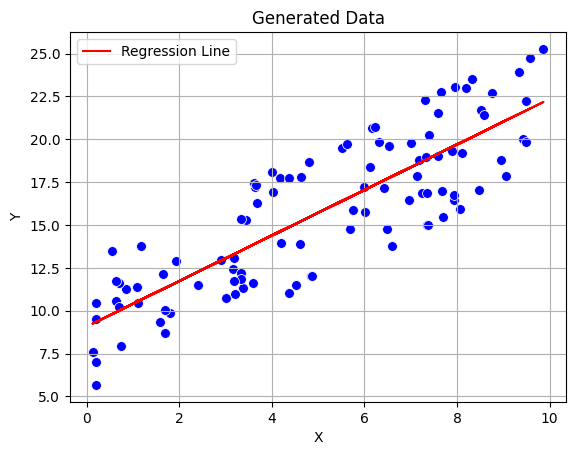

In [99]:
def plot_regressionLine(W, b):
    plot_data()

    # Plot the regression line
    x_values = data["X"] #OR: x_values = np.linspace(data["X"].min(), data["X"].max()) 
    ''' Both methods are valid, so it depends on your specific needs for the plot. 
    If you want the regression line to pass through the actual data points, use data["X"]. 
    If you prefer a smoother line, use np.linspace.
    '''
    y_values = W * x_values + b
    plt.plot(x_values, y_values, color='red', label='Regression Line')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_regressionLine(W, b)

In [100]:
def plot_history(loss_history, weight_history):
    # the loss history
    fig1 = go.Figure()
    
    fig1.add_trace(go.Scatter(
        x = list(range(len(loss_history))),  
        y = loss_history,                   
        mode = 'lines',                     
        name = 'Loss',                      
        line = dict(color='blue')           
            ))
    
    fig1.update_layout(
        title='Loss History',
        xaxis_title='Iteration',
        yaxis_title='Loss',
        xaxis=dict(showgrid=True, gridcolor='darkGray'),
        yaxis=dict(showgrid=True, gridcolor='darkGray')
            )
    fig1.show()
    
    # Plot Weight (W) and Bias (b)
    W_history, b_history = zip(*weight_history)
    fig2 = go.Figure()
    
    fig2.add_trace(go.Scatter(x=list(range(len(W_history))), y=W_history, mode='lines', name='Weight (W)', line=dict(color='green')))
    fig2.add_trace(go.Scatter(x=list(range(len(b_history))), y=b_history, mode='lines', name='Bias (b)', line=dict(color='orange')))

    fig2.update_layout(
        title='Training History',
        xaxis_title='Iteration',
        yaxis_title='Values',
        xaxis=dict(showgrid=True, gridcolor='darkGray'),
        yaxis=dict(showgrid=True, gridcolor='darkGray')
        )
    fig2.show()


plot_history(loss_history, weight_history)

### Stochastic Gradient Descent


In [101]:
def stochastic_gradient_descent(X, Y, learning_rate=0.001, epochs=40):
    logging.info("SGD process...")
    W, b = 0, 0  
    m = len(X)
    weight_history, loss_history = [], []
    
    for epoch in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(m)
        X, Y = X[indices], Y[indices]
        
        for i in range(m):
            xi, yi = X[i], Y[i]
            yi_pred = W * xi + b
    
            weight_history.append((W, b))
            loss = abs(yi - yi_pred) 
            loss_history.append(loss)

            logging.info(f"Epoch {epoch+1}, Data Point{i+1}: W = {W:.6f}, b = {b:.6f}, Loss = {loss:.6f}")
            
            # Update weights
            dW = (yi_pred - yi) * xi
            db = (yi_pred - yi)
            W -= learning_rate * dW
            b -= learning_rate * db
    
    return W, b, loss_history, weight_history


In [102]:
# Training the model
W, b, loss_history, weight_history = stochastic_gradient_descent(data["X"], data["Y"])
logging.info(f"Final weights: W = {W:.6f}, b = {b:.6f}")

2024-09-28 18:33:42,495 - INFO - SGD process...
2024-09-28 18:33:42,502 - INFO - Epoch 1, Data Point1: W = 0.000000, b = 0.000000, Loss = 9.889004
2024-09-28 18:33:42,505 - INFO - Epoch 1, Data Point2: W = 0.017827, b = 0.009889, Loss = 6.983844
2024-09-28 18:33:42,508 - INFO - Epoch 1, Data Point3: W = 0.019187, b = 0.016873, Loss = 17.675599
2024-09-28 18:33:42,511 - INFO - Epoch 1, Data Point4: W = 0.101064, b = 0.034548, Loss = 16.074265
2024-09-28 18:33:42,514 - INFO - Epoch 1, Data Point5: W = 0.217591, b = 0.050623, Loss = 13.003462
2024-09-28 18:33:42,526 - INFO - Epoch 1, Data Point6: W = 0.272232, b = 0.063626, Loss = 10.656753
2024-09-28 18:33:42,529 - INFO - Epoch 1, Data Point7: W = 0.323963, b = 0.074283, Loss = 7.458296
2024-09-28 18:33:42,532 - INFO - Epoch 1, Data Point8: W = 0.324916, b = 0.081741, Loss = 10.356098
2024-09-28 18:33:42,534 - INFO - Epoch 1, Data Point9: W = 0.375389, b = 0.092097, Loss = 16.365656
2024-09-28 18:33:42,535 - INFO - Epoch 1, Data Point10:

2024-09-28 18:33:42,874 - INFO - Epoch 2, Data Point71: W = 2.548162, b = 0.755733, Loss = 2.923613
2024-09-28 18:33:42,877 - INFO - Epoch 2, Data Point72: W = 2.557924, b = 0.758657, Loss = 4.619872
2024-09-28 18:33:42,880 - INFO - Epoch 2, Data Point73: W = 2.523817, b = 0.754037, Loss = 2.466498
2024-09-28 18:33:42,882 - INFO - Epoch 2, Data Point74: W = 2.500390, b = 0.751571, Loss = 2.735115
2024-09-28 18:33:42,883 - INFO - Epoch 2, Data Point75: W = 2.509535, b = 0.754306, Loss = 2.300265
2024-09-28 18:33:42,885 - INFO - Epoch 2, Data Point76: W = 2.523604, b = 0.756606, Loss = 7.352640
2024-09-28 18:33:42,888 - INFO - Epoch 2, Data Point77: W = 2.550490, b = 0.763959, Loss = 1.349164
2024-09-28 18:33:42,906 - INFO - Epoch 2, Data Point78: W = 2.556717, b = 0.765308, Loss = 5.268114
2024-09-28 18:33:42,908 - INFO - Epoch 2, Data Point79: W = 2.560669, b = 0.770576, Loss = 4.409183
2024-09-28 18:33:42,910 - INFO - Epoch 2, Data Point80: W = 2.561521, b = 0.774985, Loss = 1.295154


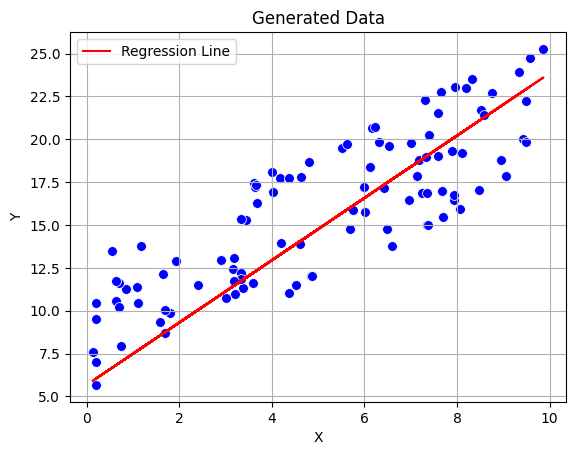

In [103]:
plot_regressionLine(W, b)

In [104]:
plot_history(loss_history, weight_history)

### Mini-Batch Gradient Descent

In [105]:
def mini_batch_gradient_descent(X, Y, learning_rate=0.01, epochs=100, batch_size=20):
    logging.info("MBGD process...")
    W, b = 0, 0
    m = len(X)
    num_batches = m // batch_size
    weight_history, loss_history = [], []

    for epoch in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(m)
        X, Y = X[indices], Y[indices]

        for i in range(0, m, batch_size):
            X_batch = X[i:i + batch_size]
            Y_batch = Y[i:i + batch_size]

            y_pred = W * X_batch + b

            weight_history.append((W, b))
            loss = (1 / (2 * batch_size)) * np.sum((Y_batch - y_pred) ** 2)
            loss_history.append(loss)

            logging.info(f"Epoch {epoch + 1}, Batch {i // batch_size + 1}: W = {W:.6f}, b = {b:.6f}, Loss = {loss:.6f}")
            

            # Update weights
            dW = (1 / batch_size) * np.sum((y_pred - Y_batch) * X_batch)
            db = (1 / batch_size) * np.sum(y_pred - Y_batch)
            W = W - learning_rate * dW
            b = b - learning_rate * db

    return W, b, loss_history, weight_history

In [106]:
# Training the model
W, b, loss_history, weight_history = mini_batch_gradient_descent(data["X"], data["Y"])
logging.info(f"Final weights: W = {W:.6f}, b = {b:.6f}")

2024-09-28 18:33:52,830 - INFO - MBGD process...
2024-09-28 18:33:52,840 - INFO - Epoch 1, Batch 1: W = 0.000000, b = 0.000000, Loss = 148.392917
2024-09-28 18:33:52,845 - INFO - Epoch 1, Batch 2: W = 1.042887, b = 0.165523, Loss = 58.304434
2024-09-28 18:33:52,850 - INFO - Epoch 1, Batch 3: W = 1.641400, b = 0.270107, Loss = 25.364518
2024-09-28 18:33:52,856 - INFO - Epoch 1, Batch 4: W = 1.979342, b = 0.336304, Loss = 19.940726
2024-09-28 18:33:52,861 - INFO - Epoch 1, Batch 5: W = 2.174507, b = 0.390289, Loss = 20.930499
2024-09-28 18:33:52,869 - INFO - Epoch 2, Batch 1: W = 2.354894, b = 0.446836, Loss = 11.249929
2024-09-28 18:33:52,875 - INFO - Epoch 2, Batch 2: W = 2.473546, b = 0.481716, Loss = 12.942200
2024-09-28 18:33:52,879 - INFO - Epoch 2, Batch 3: W = 2.423764, b = 0.496103, Loss = 12.487977
2024-09-28 18:33:52,883 - INFO - Epoch 2, Batch 4: W = 2.469059, b = 0.520108, Loss = 11.781753
2024-09-28 18:33:52,888 - INFO - Epoch 2, Batch 5: W = 2.546894, b = 0.555141, Loss = 

2024-09-28 18:33:53,742 - INFO - Epoch 26, Batch 5: W = 2.294161, b = 2.657576, Loss = 7.592906
2024-09-28 18:33:53,751 - INFO - Epoch 27, Batch 1: W = 2.299339, b = 2.674232, Loss = 7.798422
2024-09-28 18:33:53,758 - INFO - Epoch 27, Batch 2: W = 2.294678, b = 2.688457, Loss = 5.223446
2024-09-28 18:33:53,764 - INFO - Epoch 27, Batch 3: W = 2.353814, b = 2.708533, Loss = 8.158069
2024-09-28 18:33:53,768 - INFO - Epoch 27, Batch 4: W = 2.266868, b = 2.711916, Loss = 7.881131
2024-09-28 18:33:53,777 - INFO - Epoch 27, Batch 5: W = 2.336973, b = 2.740247, Loss = 10.690874
2024-09-28 18:33:53,785 - INFO - Epoch 28, Batch 1: W = 2.249097, b = 2.743809, Loss = 8.006018
2024-09-28 18:33:53,793 - INFO - Epoch 28, Batch 2: W = 2.312056, b = 2.769094, Loss = 5.882413
2024-09-28 18:33:53,798 - INFO - Epoch 28, Batch 3: W = 2.293684, b = 2.777745, Loss = 8.266684
2024-09-28 18:33:53,804 - INFO - Epoch 28, Batch 4: W = 2.275714, b = 2.794569, Loss = 6.137936
2024-09-28 18:33:53,809 - INFO - Epoch 

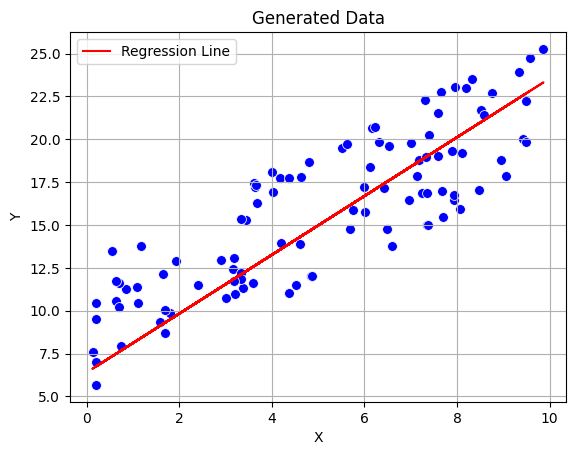

In [107]:
plot_regressionLine(W, b)

In [108]:
plot_history(loss_history, weight_history)